## Animations

This section was created by Justin Tran, an Undergraduate 
Junior majoring in Applied Data Analysis with minors in 
Public Policy and Urban and Community Studies.

For this section, we will demonstrate Matplotlib's `FuncAnimation` tool, a powerful way to turn static plots into grand visualizations.


### What is Data Animation?

Data Animation is the process of showing change over time through a continously updating plot.

It is commonly used to visualize progress, simulations, or changing datasets, including:


    - Simulations like rolling dice.
    - A scatterplot which updates with new data.
    - A line chart that grows over time, like exponential graphs.

[![Mathematica's Animated Bar Chart Race](https://i.sstatic.net/vrU3R.gif)](https://mathematica.stackexchange.com/questions/257802/animated-bar-chart-race-a-popular-data-visualization/)

### Matplotlib

Created in 2008 by John D. Hunter, Matplotlib is one of Python's most used library for plotting and visualization. You are able to create line, scatter, bar, and histogram plots. You can customize colors, labels, and configure layouts. For this section, we can use Matplotlib's advanced modules like animations to make more dynamic visualizations.

The specific tool we are focused on is `matplotlib.animation.FuncAnimation`, it is used to update our plot frame-by-frame.


#### Installation of Matplotlib and FuncAnimation

To use `FuncAnimation`, you first will need to install `Matplotlib`. Inside your terminal, use the corresponding manager you currently use.

In [ ]:
pip install matplotlib                     # Users with pip
conda install -c conda-forge matplotlib    # Users with conda
pixi add matplotlib                        # Users with pixi
uv add matplotlib                          # Users with uv

To ensure that you installed matplotlib correctly, run this code to check it's version. If you get a version number, then it is installed.

In [ ]:
import matplotlib
print(matplotlib.__version__)

Once you've installed matplotlib, now it's time to import it. To import, run these codes.

In [ ]:
import matplotlib.pyplot as plt

### Creating Static Plots

Normally, you may want to create a simple plot where you are rolling a dice and see the probability of you rolling a six. So, we will create a line plot.

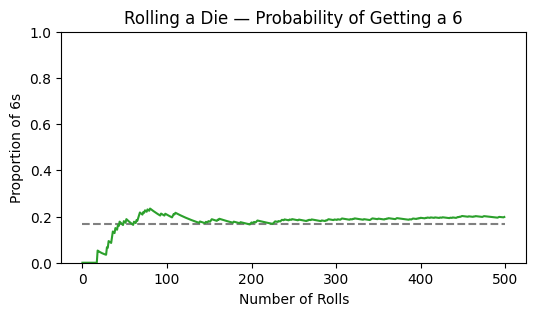

In [3]:
import random
import matplotlib.pyplot as plt

random.seed(3255)

# The Function
def prob_six(trials):
    results = []
    prop_six = []
    for i in range(trials):
        roll = random.randint(1, 6)        # roll a 6-sided die
        results.append(roll == 6)          # Adds a value only if it rolls a 6
        prop_six.append(sum(results) / len(results))
    return prop_six

# Matplotlib's pyplot
plt.figure(figsize=(6, 3))
plt.hlines(1/6, 0, 500, linestyles='dashed', color='gray')  
plt.plot(prob_six(500), color='tab:green')
plt.ylim(0, 1)
plt.title("Rolling a Die — Probability of Getting a 6")
plt.ylabel("Proportion of 6s")
plt.xlabel("Number of Rolls")
plt.show()

You can also use different types of charts, like bar charts. This example will show how many times each number gets rolled when we roll a dice hundreds of times.

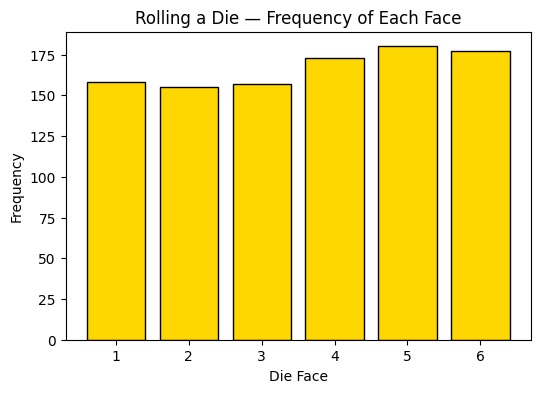

In [2]:
import random
import matplotlib.pyplot as plt

random.seed(3255)

# The Function
trials = 1000
rolls = [random.randint(1, 6) for _ in range(trials)]

counts = [rolls.count(i) for i in range(1, 7)]

# Matplotlib's pyplot
plt.figure(figsize=(6, 4))
plt.bar(range(1, 7), counts, color='gold', edgecolor='black')
plt.title("Rolling a Die — Frequency of Each Face")
plt.xlabel("Die Face")
plt.ylabel("Frequency")
plt.xticks(range(1, 7))
plt.show()

### FuncAnimation

Now, to use FuncAnimation, we need to understand how to call it and all the required arguments within.

In [ ]:
from matplotlib.animation import FuncAnimation

anim = FuncAnimation(
    fig,
    update,
    frames,
    interval,
    repeat
)

- `fig` = The Matplotlib figure that will be animated
- `update` = The update function that's called once per frame
- `frames` = The total number of frames
    - Will be `range(n)`, where n is the total number of frames
- `interval` = The delay between frames in milliseconds
    - interval=`50` means 20 frames per second
- `repeat` = Whether you would like to loop the animation
    - Either `False` or `True`

Now, to do the animation on the probability of rolling a 6, this is the code to run.

In [ ]:
from matplotlib.animation import FuncAnimation

prop_six = prob_six(500)
frames = range(len(prop_six))

# This starts to create the figure
fig, ax = plt.subplots(figsize=(8, 4))

# This is the update function
def update(frame):
    ax.clear()
    ax.set_title("Rolling a Die — Probability of Getting a 6")
    ax.set_ylabel("Proportion of 6s")
    ax.set_xlabel("Number of Rolls")
    ax.hlines(1/6, 0, frame+1, linestyles='dashed', color='gray')
    ax.set_ylim(0, 1)

    # This shows the percentage at each frame
    ax.text(
        frame+1,
        prop_six[frame] * 1.05,
        f'{prop_six[frame]:.3f}',
        weight='bold',
        color='tab:green'
    )
    ax.plot(range(1, frame+1), prop_six[:frame], color='tab:green')

# Now we create the animation
anim = FuncAnimation(fig, update, frames=frames, repeat=False, interval=50)

# This saves as a gif
anim.save("dice_prob.gif", writer="pillow", fps=20)

plt.close(fig)

[![Animated Dice Roll, Probabiliity of rolling a 6](dice_prob.gif)]